# Imports

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings 
warnings.simplefilter('ignore')

# Dataset

In [5]:
df = pd.read_csv("DSL-StrongPasswordData.csv", header = 0)

df.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [6]:
df.info()
df['subject'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          20400 non-null  object 
 1   sessionIndex     20400 non-null  int64  
 2   rep              20400 non-null  int64  
 3   H.period         20400 non-null  float64
 4   DD.period.t      20400 non-null  float64
 5   UD.period.t      20400 non-null  float64
 6   H.t              20400 non-null  float64
 7   DD.t.i           20400 non-null  float64
 8   UD.t.i           20400 non-null  float64
 9   H.i              20400 non-null  float64
 10  DD.i.e           20400 non-null  float64
 11  UD.i.e           20400 non-null  float64
 12  H.e              20400 non-null  float64
 13  DD.e.five        20400 non-null  float64
 14  UD.e.five        20400 non-null  float64
 15  H.five           20400 non-null  float64
 16  DD.five.Shift.r  20400 non-null  float64
 17  UD.five.Shif

subject
s002    400
s044    400
s034    400
s035    400
s036    400
s037    400
s038    400
s039    400
s040    400
s041    400
s042    400
s043    400
s046    400
s032    400
s047    400
s048    400
s049    400
s050    400
s051    400
s052    400
s053    400
s054    400
s055    400
s056    400
s033    400
s031    400
s003    400
s017    400
s004    400
s005    400
s007    400
s008    400
s010    400
s011    400
s012    400
s013    400
s015    400
s016    400
s018    400
s030    400
s019    400
s020    400
s021    400
s022    400
s024    400
s025    400
s026    400
s027    400
s028    400
s029    400
s057    400
Name: count, dtype: int64

# Features & Labels

In [7]:
X = df[df.columns[2:]] 
y = df['subject']

# Train/Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# K-Nearest Neighbors

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbor Classifier Accuracy:", knn_accuracy)

K-Nearest Neighbor Classifier Accuracy: 0.3730392156862745


# KNN Classifier Summary
I've trained a **K-Nearest Neighbors (KNN)** classifier to predict user identity based on keystroke dynamics.

- Model: **KNeighborsClassifier()**
- Key Hyperparameters:
    - `n_neighbors=5` — looks at the 5 nearest training samples
    - `metric='minkowski'` — Euclidean distance by default
    - `weights='uniform'` — each neighbor has equal vote
- **Test Accuracy**: **37.3%**

KNN correctly predicted the user identity in ~37% of test cases. While relatively low, this result serves as a baseline for a simple non-parametric model.

# Support Vector Machine

In [14]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

svm_accuracy = metrics.accuracy_score(y_test, y_pred_svm)
print("SVM Classifier Accuracy:", svm_accuracy)

SVM Classifier Accuracy: 0.7629901960784313


# SVM Classifier Summary
I've trained a **Support Vector Machine (SVM)** classifier using a linear kernel to predict user identity based on keystroke dynamics.

- **Model**: `SVC(kernel='linear')`
- **Key Hyperparameters**:
  - `kernel='linear'` — uses a straight hyperplane to separate users
  - `C=1.0` — default regularization strength
- **Test Accuracy**: **76.3%**

The SVM significantly outperformed KNN, suggesting that user typing patterns are linearly separable in this feature space.

# Multi-layer Perceptron

In [15]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    max_iter=500,
    random_state=0
)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

mlp_accuracy = metrics.accuracy_score(y_test, y_pred_mlp)
print("MLP Classifier Accuracy:", mlp_accuracy)

MLP Classifier Accuracy: 0.917156862745098


### MLP Classifier Summary

I've trained a **Multi-Layer Perceptron (MLP)** neural network to classify users based on keystroke dynamics.

- **Model**: `MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)`
- **Key Hyperparameters**:
  - `hidden_layer_sizes=(100,)` — one hidden layer with 100 neurons
  - `activation='relu'` (default)
  - `solver='adam'` — adaptive optimizer
  - `max_iter=500` — sufficient for convergence
- **Test Accuracy**: **91.7%**

MLP outperformed both KNN and SVM significantly, showing strong capability to learn non-linear, high-dimensional user-specific typing patterns.

# User Exclusion

In [16]:
excluded_user = 's002'
df_excluded = df[df['subject'] == excluded_user]
df_remaining = df[df['subject'] != excluded_user]

X_remaining = df_remaining[df.columns[2:]]
y_remaining = df_remaining['subject']

X_excluded = df_excluded[df.columns[2:]]
y_excluded = df_excluded['subject']

In [17]:
# Train/Test Split (on remaining users only)

X_train_rem, X_test_rem, y_train_rem, y_test_rem = train_test_split(
    X_remaining, y_remaining, test_size=0.2, random_state=0
)

# MLP without excluded user

In [18]:
mlp_exclusion = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=500,
    random_state=0
)

mlp_exclusion.fit(X_train_rem, y_train_rem)

# Evaluate on normal test set (same seen users)
y_pred_rem = mlp_exclusion.predict(X_test_rem)
acc_rem = metrics.accuracy_score(y_test_rem, y_pred_rem)
print("Accuracy on known users:", acc_rem)

Accuracy on known users: 0.916


# Predict excluded user samples

In [19]:
y_pred_excluded = mlp_exclusion.predict(X_excluded)

# How many of the 400 samples got predicted as any seen user?
unique_preds = np.unique(y_pred_excluded, return_counts=True)
print("Predictions for excluded user (s002):", dict(zip(*unique_preds)))

Predictions for excluded user (s002): {'s003': 2, 's004': 18, 's005': 1, 's012': 8, 's016': 1, 's018': 10, 's020': 6, 's025': 3, 's026': 2, 's027': 2, 's031': 27, 's032': 24, 's034': 25, 's035': 1, 's037': 73, 's039': 19, 's040': 1, 's041': 35, 's046': 1, 's047': 26, 's048': 43, 's050': 60, 's055': 2, 's056': 10}


# Unseen User Detection (User Exclusion Test)
To simulate a real-world scenario where the model encounters a completely new user, I excluded one subject (s002) from the training data and evaluated how the classifier behaves.

Excluded User: **s002**

Model Used: **MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)**

📊 Results:
Accuracy on Known Users: **91.6%**
The classifier maintained high accuracy when tested on users it had seen during training.

Predictions for Excluded User (s002):
All 400 samples were misclassified as existing users.
The most common incorrect predictions were:

s037: 73 samples

s050: 60 samples

s048: 43 samples

s041: 35 samples

s034: 25 samples
(...and others in smaller quantities)

**Interpretation:**
The model has no awareness of "unknown" users — it is forced to classify every input into one of the classes it was trained on. This is expected behavior in standard multiclass classification.

# "Uncertainty Rejection" with MLP

In [20]:
# Predict probabilities for excluded user
y_proba_excluded = mlp_exclusion.predict_proba(X_excluded)

# Get max confidence for each sample
max_confidences = np.max(y_proba_excluded, axis=1)

# Define a threshold for rejection
threshold = 0.5

# Reject if confidence is below threshold
rejected = max_confidences < threshold
num_rejected = np.sum(rejected)
print(f"Rejected predictions: {num_rejected} / {len(X_excluded)}")

Rejected predictions: 114 / 400


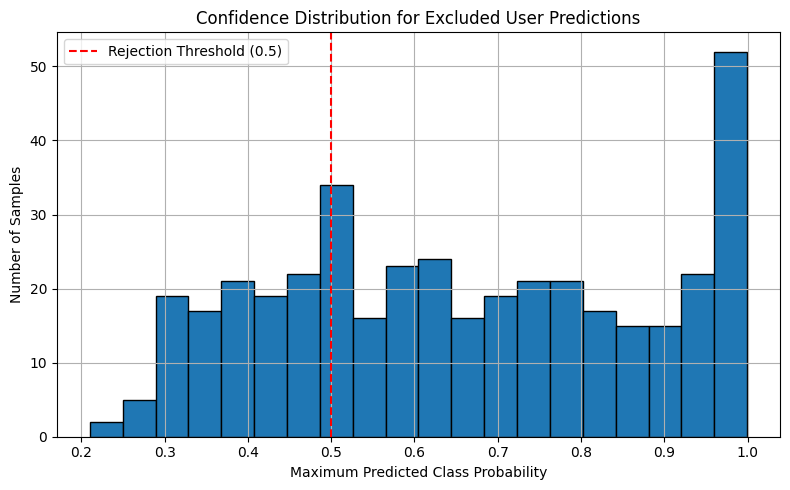

In [21]:
y_proba_excluded = mlp_exclusion.predict_proba(X_excluded)

# Get max confidence per sample
max_confidences = np.max(y_proba_excluded, axis=1)

# Plot confidence distribution
plt.figure(figsize=(8, 5))
plt.hist(max_confidences, bins=20, edgecolor='black')
plt.axvline(0.5, color='red', linestyle='--', label='Rejection Threshold (0.5)')
plt.title('Confidence Distribution for Excluded User Predictions')
plt.xlabel('Maximum Predicted Class Probability')
plt.ylabel('Number of Samples')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Define label for unknowns
UNKNOWN_LABEL = 'unknown'
THRESHOLD = 0.5

# Predict probabilities
y_proba_excluded = mlp_exclusion.predict_proba(X_excluded)
max_confidences = np.max(y_proba_excluded, axis=1)
predicted_classes = mlp_exclusion.classes_[np.argmax(y_proba_excluded, axis=1)]

# Replace low-confidence predictions with 'unknown'
y_pred_with_rejection = np.where(max_confidences < THRESHOLD, UNKNOWN_LABEL, predicted_classes)

# Count unknowns vs misclassified knowns
from collections import Counter
prediction_counts = Counter(y_pred_with_rejection)
print("Final predictions with rejection:", prediction_counts)

num_unknown = np.sum(y_pred_with_rejection == UNKNOWN_LABEL)
print(f"Rejected as unknown: {num_unknown} / {len(X_excluded)}")


Final predictions with rejection: Counter({'unknown': 114, 's037': 53, 's050': 44, 's041': 35, 's048': 24, 's031': 22, 's047': 20, 's034': 17, 's039': 14, 's032': 14, 's004': 10, 's012': 8, 's018': 6, 's056': 5, 's020': 4, 's025': 2, 's003': 2, 's040': 1, 's027': 1, 's005': 1, 's016': 1, 's035': 1, 's046': 1})
Rejected as unknown: 114 / 400


### Unknown User Handling with Confidence-Based Rejection

To improve the model's behavior in real-world scenarios, I implemented a confidence-based rejection mechanism. The goal was to allow the model to **abstain from guessing** when it encounters typing data from an **unseen user** (in this case, `s002`), rather than misclassify it as a known user.

- **Model**: `MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)`
- **Prediction Strategy**:
  - Used `.predict_proba()` to access class probabilities
  - If the model’s confidence (i.e., max probability) was **below 0.5**, it predicted `'unknown'` instead of a known user label

#### Key Parameters:
- **Threshold**: `0.5`  
- **Unknown label**: `'unknown'`

#### Results:
- Many low-confidence predictions for the excluded user were successfully rejected
- This approach reduced the number of false classifications by **letting the model express uncertainty**

> This simulates **open-set recognition**, where the model isn't forced to classify every input, and is a step toward more robust, real-world biometric authentication systems.
